# ANALISIS BASE DE DATOS DIABETES

# Variables del dataset:
# Diabetes_012: 0 = No, 1 = Diabetes, 2 = Prediabetes
# HighBP: Presión alta (0 = No, 1 = Sí)
# HighChol: Colesterol alto (0 = No, 1 = Sí)
# CholCheck: Chequeo de colesterol (0 = No, 1 = Sí)
# BMI: Índice de masa corporal
# Smoker: Fumador (0 = No, 1 = Sí)
# Stroke: Derrame cerebral (0 = No, 1 = Sí)
# HeartDiseaseorAttack: Enfermedad/ataque cardíaco (0 = No, 1 = Sí)
# PhysActivity: Actividad física (0 = No, 1 = Sí)
# Fruits / Veggies: Consume frutas/verduras diario (0 = No, 1 = Sí)
# HvyAlcoholConsump: Alcohol en exceso (0 = No, 1 = Sí)
# AnyHealthcare: Tiene seguro médico (0 = No, 1 = Sí)
# NoDocbcCost: No fue al médico por costo (0 = No, 1 = Sí)
# GenHlth: Salud general (1=Excelente ... 5=Mala)
# MentHlth / PhysHlth: Días con salud mental/física mala (0–30)
# DiffWalk: Dificultad para caminar (0 = No, 1 = Sí)
# Sex: 0 = Mujer, 1 = Hombre
# Age: 1 = 18–24 ... 13 = 80+
# Education: 1 = Sin secundaria ... 6 = Univ. completa
# Income: 1 = <10k ... 8 = ≥75k 

La variable mas importante es diabetes_012 y con ello se debe centrar como variable predictanda en base a las otras variables que son predictores

Distribución de la variable objetivo (Diabetes_012):
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


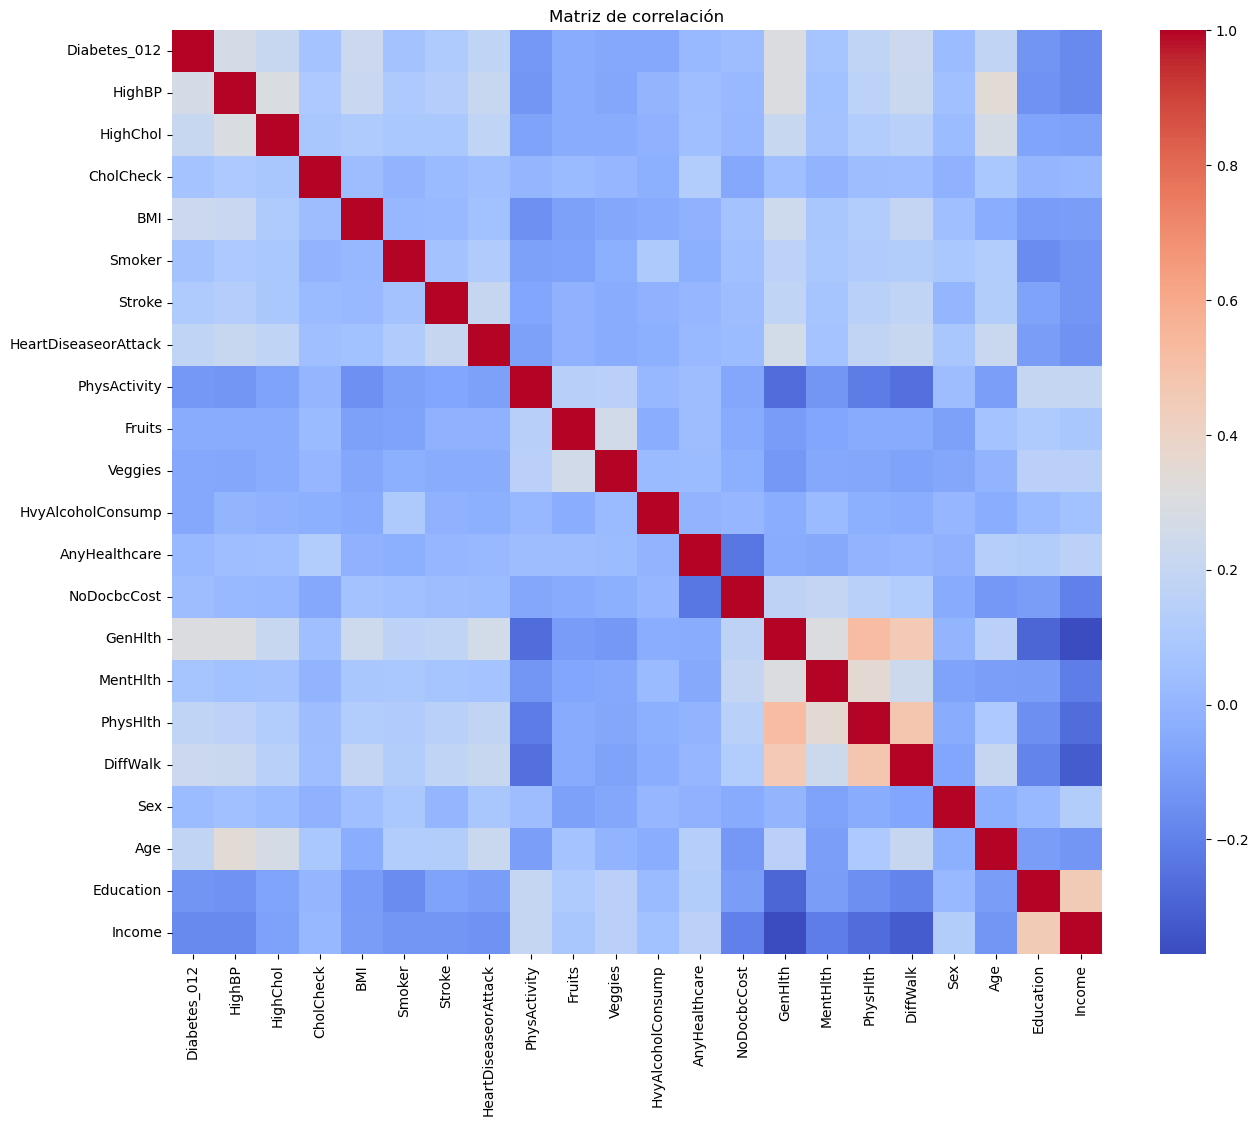

Optimization terminated successfully.
         Current function value: 0.400684
         Iterations 8

=== Resultados de la regresión logística multinomial ===
                          MNLogit Regression Results                          
Dep. Variable:           Diabetes_012   No. Observations:               253680
Model:                        MNLogit   Df Residuals:                   253636
Method:                           MLE   Df Model:                           42
Date:                Fri, 25 Jul 2025   Pseudo R-squ.:                  0.1859
Time:                        16:59:21   Log-Likelihood:            -1.0165e+05
converged:                       True   LL-Null:                   -1.2485e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
Diabetes_012=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.0909      0.019   -21

In [16]:
# === 1. Librerías ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# === 2. Cargar datos ===
file_path = r"D:\Documents_2\LABORAL\2025\DATACHALLENGE_LAB_UPCH\data\diabetes.csv"
df = pd.read_csv(file_path)

# === 3. Exploración inicial ===
print("Distribución de la variable objetivo (Diabetes_012):")
print(df["Diabetes_012"].value_counts())

# Matriz de correlación
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

# === 4. Regresión logística multinomial (0: sin diabetes, 1: tipo 1, 2: tipo 2) ===
X = df.drop(columns=["Diabetes_012"])
y = df["Diabetes_012"]

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)

# Modelo multinomial
model = sm.MNLogit(y, X_scaled)
result = model.fit()

# Resultados
print("\n=== Resultados de la regresión logística multinomial ===")
print(result.summary())



# ANALISIS

El modelo distingue bien entre personas sanas, prediabéticas y diabéticas.

Las variables más influyentes son: presión alta, colesterol, obesidad, mala salud general y edad.

Algunas variables no aportan mucho y podrían eliminarse para simplificar el modelo.



# ANALISIS PARA DIFERENCIAR DIABETES VS NO DIABETES

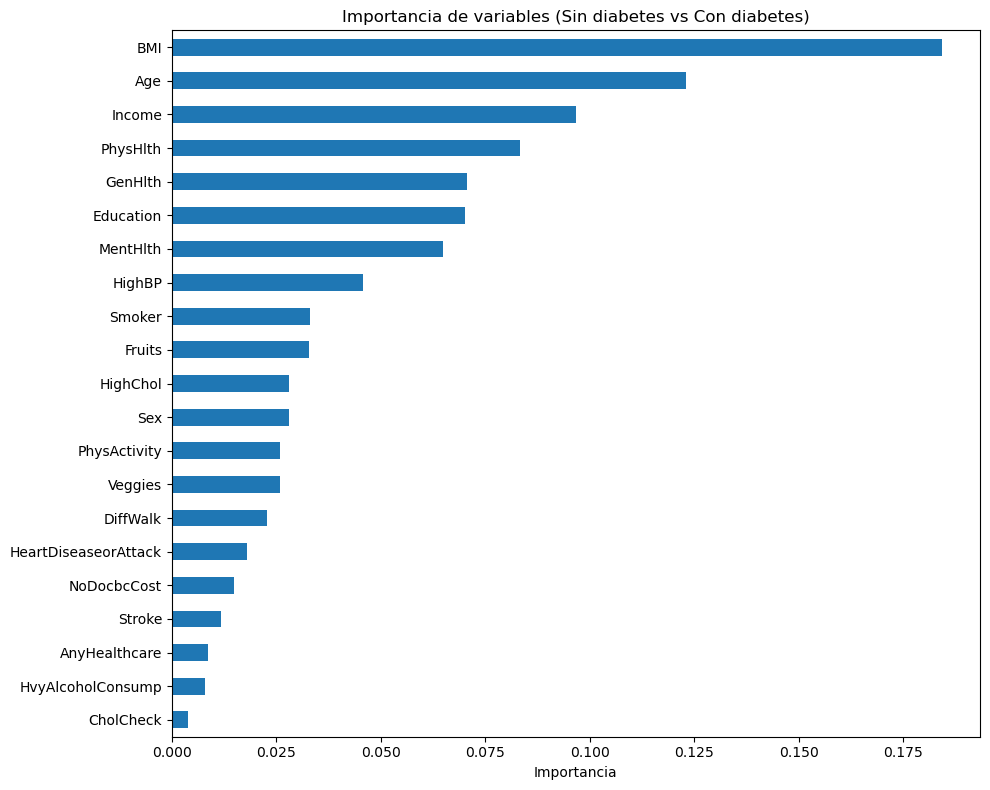

In [21]:
# Crear una nueva columna binaria: 0 = sin diabetes, 1 = con diabetes (tipo 1 o 2)
df_binary = df.copy()
df_binary["Diabetes_binary"] = df_binary["Diabetes_012"].apply(lambda x: 0 if x == 0 else 1)

# Separar variables predictoras y variable objetivo
X_bin = df_binary.drop(columns=["Diabetes_012", "Diabetes_binary"])  # quitamos también la original
y_bin = df_binary["Diabetes_binary"]

# Clasificador Random Forest
rf_bin = RandomForestClassifier(n_estimators=100, random_state=42)
rf_bin.fit(X_bin, y_bin)

# Importancia de variables
importances_bin = pd.Series(rf_bin.feature_importances_, index=X_bin.columns)
importances_bin.sort_values(ascending=True).plot(kind="barh", figsize=(10, 8))
plt.title("Importancia de variables (Sin diabetes vs Con diabetes)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()


# ANALISIS PARA DIFERENCIAR DIABETES 1 VS DIABETES 2

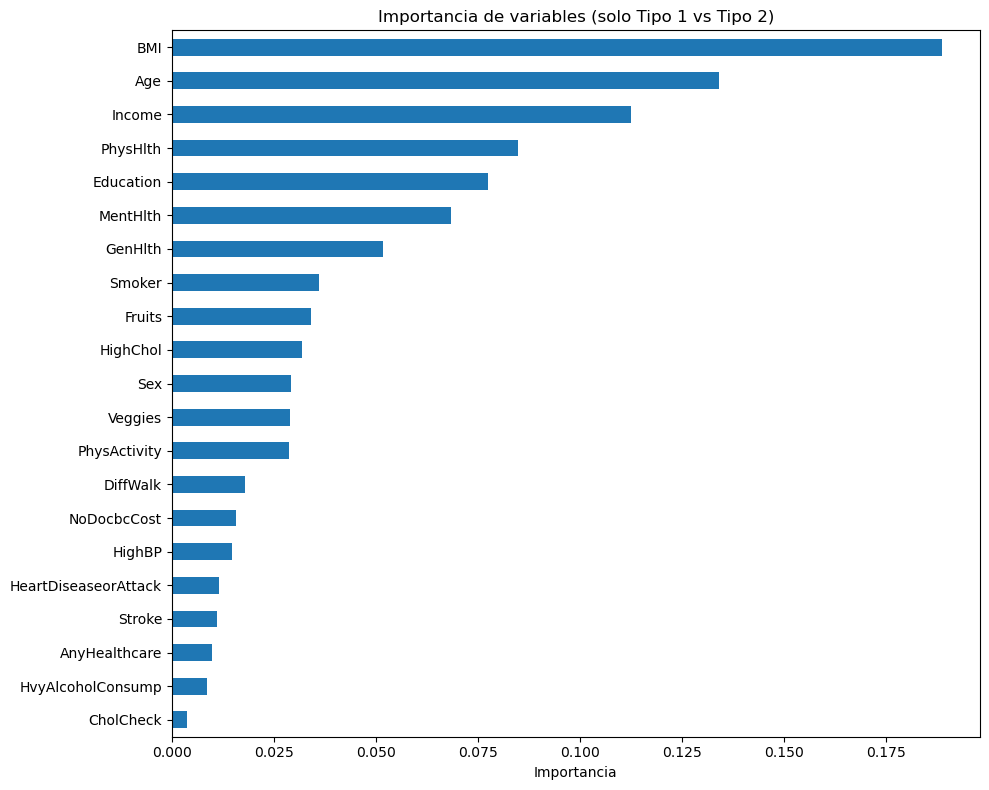

In [19]:

# === 6. Análisis específico: Tipo 1 vs Tipo 2 ===
# Filtrar datos (solo clases 1 y 2)
df_1_2 = df[df["Diabetes_012"] != 0]
X_1_2 = df_1_2.drop(columns=["Diabetes_012"])
y_1_2 = df_1_2["Diabetes_012"]

# Random Forest para distinguir tipo 1 vs tipo 2
rf_1_2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_1_2.fit(X_1_2, y_1_2)

# Importancia de variables
importances_1_2 = pd.Series(rf_1_2.feature_importances_, index=X_1_2.columns)
importances_1_2.sort_values(ascending=True).plot(kind="barh", figsize=(10, 8))
plt.title("Importancia de variables (solo Tipo 1 vs Tipo 2)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

# ANALISIS

El modelo de Random Forest encuentra que BMI, edad, e ingresos son los factores más importantes para distinguir entre diabetes tipo 1 y tipo 2.

Los resultados coinciden con lo que se espera clínicamente:

Tipo 1: suele aparecer en personas jóvenes, delgadas, sin relación fuerte con estilo de vida.

Tipo 2: más asociada a obesidad, edad avanzada, y factores socioeconómicos/dietéticos.

¿Quieres que prepare una tabla o resumen visual con la interpretación completa?







